In [303]:
#pip3 install wheel
#pip3 install pandas

import pandas as pd
import requests
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 999

#!pip3 install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [312]:
# Request the JSON from the API

for p in range(1,50):
    url = 'https://api.ergoplatform.com/api/v1/tokens?limit=500&page=' + str(p)
    r = requests.get(url)
    json = r.json()



In [313]:
# Query the JSON

#json.keys()

#json['items']

json['total']

#json

27656

In [314]:
# load json into a dataframe
df = pd.DataFrame(json['items'])

df2 = df[df['name'].str.contains("ergopad")]

df2.head(3)
#df2.count()

,id,boxId,emissionAmount,name,description,type,decimals
0,b2483fc6f8f7e5b5d9a047aba774e13536f3ee4e0b2170...,bc24bd9b41af4deb6d3196cee87cda93412ebc46b63f42...,1,ergopad Stake Key,"{""originalAmountStaked"": 10986.66, ""stakeTime""...",EIP-004,0
1,0d6c3dd2e45b4eb7ea018363e36a71ec8cfc09906d8065...,6faffff4ab96691813e89c8637cd3bdd0b71a49de31893...,1,ergopad Stake Key,"{""originalAmountStaked"": 503.23, ""stakeTime"": ...",EIP-004,0
11,95c3f840ab426ff08b5c2019d7c267f68199792db51192...,e6556e5ceb4428c83a4abc268c5a99eb3ac16bd2febebb...,1,ergopad Stake Key,"{""originalAmountStaked"": 21888.66, ""stakeTime""...",EIP-004,0


In [315]:
# Drop irrelevant columns
df2 = df2.drop(['emissionAmount', 'type', 'decimals','name' ],axis =1)
df2.head(3)

,id,boxId,description
0,b2483fc6f8f7e5b5d9a047aba774e13536f3ee4e0b2170...,bc24bd9b41af4deb6d3196cee87cda93412ebc46b63f42...,"{""originalAmountStaked"": 10986.66, ""stakeTime""..."
1,0d6c3dd2e45b4eb7ea018363e36a71ec8cfc09906d8065...,6faffff4ab96691813e89c8637cd3bdd0b71a49de31893...,"{""originalAmountStaked"": 503.23, ""stakeTime"": ..."
11,95c3f840ab426ff08b5c2019d7c267f68199792db51192...,e6556e5ceb4428c83a4abc268c5a99eb3ac16bd2febebb...,"{""originalAmountStaked"": 21888.66, ""stakeTime""..."


In [316]:
# Get
df2[['original','time']]=df2['description'].map(eval).apply(pd.Series)
df2.head(10)

,id,boxId,description,original,time
0,b2483fc6f8f7e5b5d9a047aba774e13536f3ee4e0b2170...,bc24bd9b41af4deb6d3196cee87cda93412ebc46b63f42...,"{""originalAmountStaked"": 10986.66, ""stakeTime""...",10986.660,2022-03-05 13:50:00.526547
1,0d6c3dd2e45b4eb7ea018363e36a71ec8cfc09906d8065...,6faffff4ab96691813e89c8637cd3bdd0b71a49de31893...,"{""originalAmountStaked"": 503.23, ""stakeTime"": ...",503.230,2022-03-05 13:45:53.367203
11,95c3f840ab426ff08b5c2019d7c267f68199792db51192...,e6556e5ceb4428c83a4abc268c5a99eb3ac16bd2febebb...,"{""originalAmountStaked"": 21888.66, ""stakeTime""...",21888.660,2022-03-05 12:20:25.810959
12,9ecf8f182361217595a29ba3a70637708d0e54dacbd2f6...,f4eaea7623644d5d02e7eb69e392adcf5d3d4b87635b7c...,"{""originalAmountStaked"": 2216.66, ""stakeTime"":...",2216.660,2022-03-05 12:10:14.421071
18,4fda43fc3b257978b5e7f9b3fd82f037f6114348d7adbc...,790d7edb33558ebb50183072f755efc10bc6cc7c1a408d...,"{""originalAmountStaked"": 354.06, ""stakeTime"": ...",354.060,2022-03-05 12:05:02.636429
19,c1ee0d89ecf7bcbafa40dc3b07f85cb0ba690e6ab8ed80...,04f495688e276a2a7cc97eb39fb5cbcc6a081eb0d20263...,"{""originalAmountStaked"": 20.31, ""stakeTime"": ""...",20.310,2022-03-05 12:03:28.783308
21,3d8d9586234e6d69cda602c61984c2358b43d25fba7b34...,a179fcf678d1f956f4ad554de3649243a6080f85600f2b...,"{""originalAmountStaked"": 4604.27, ""stakeTime"":...",4604.270,2022-03-05 11:54:14.619601
23,83f286a29566ee001d106da2f5d81950ddedf5af5e74a6...,8f427e0442617c9e088578cf00a1744d17d641049a2583...,"{""originalAmountStaked"": 20833.32, ""stakeTime""...",20833.320,2022-03-05 11:09:13.733111
24,b853fb4fdbc12b4d3cf9e5c9b361fa1d6d469fc912290d...,978869198cd54e612f0f2129b771d69b03396205f61e6c...,"{""originalAmountStaked"": 11.86, ""stakeTime"": ""...",11.860,2022-03-05 10:53:44.237337
25,95f78ff919ecc675b8af7d7e76f37755cefc601c8ca2bd...,dd6718c51cee3bd1b97308e72972ef68fa1d2140de6807...,"{""originalAmountStaked"": 759.66, ""stakeTime"": ...",759.660,2022-03-05 10:32:58.508503


In [321]:
df2 = df2.drop(['description' ],axis =1)

In [319]:
df2.sort_values(by=['original'])
df2.to_csv("stakers.csv", index=False)

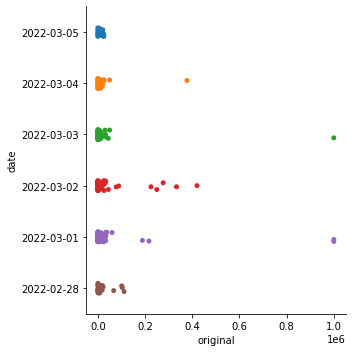

In [320]:
df = df2
#sns.jointplot(x=df['original'], y=df['time'], data=df, kind='reg')

#df.hist()
df['date'] = df['time'].str.slice(0,10)
sns.catplot(x="original", y="date",  data=df)
#sns.catplot(x="date", y="original", jitter=False, data=df)
#sns.catplot(x="original", y="date", hue="time", kind="swarm", data=df)



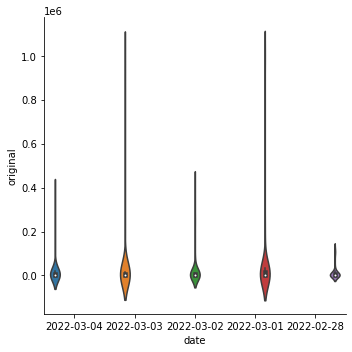

In [296]:

sns.catplot(x="date", y="original", hue="date",
            kind="violin", data=df)

<AxesSubplot:xlabel='original'>

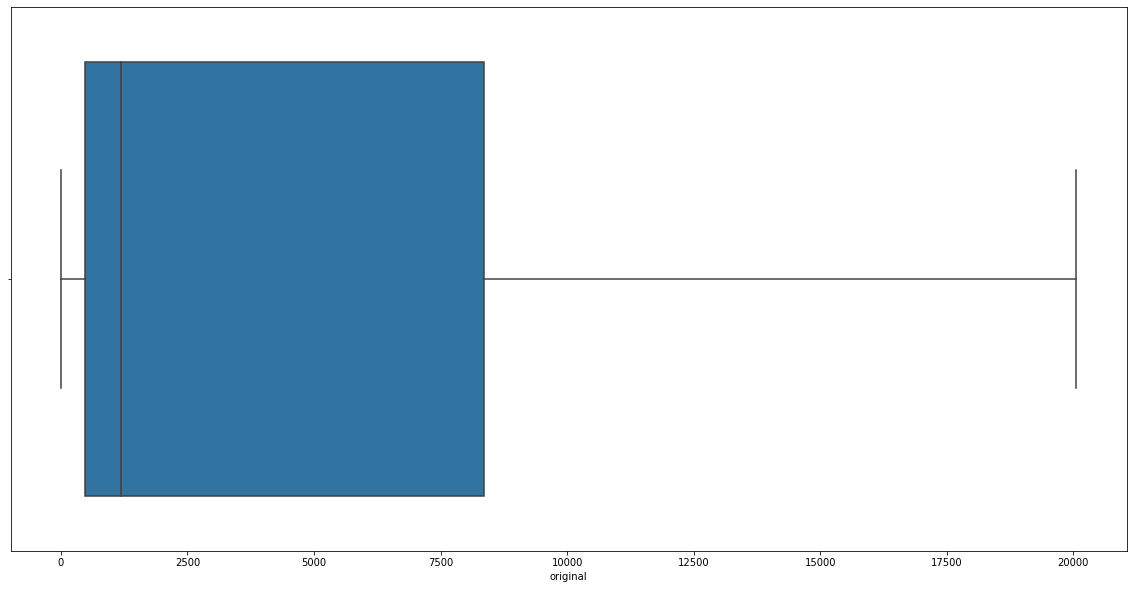

In [297]:
sns.boxplot(x = 'original', data = df, showfliers = False)


In [298]:
df.head(5)

,id,boxId,original,time,date
0,3671f5aaa98784e2d5542625f8facc48c4e836c737d476...,a76151d9e8e6dd1078dffba7937a053fccbdfdb7b4690f...,474.300,2022-03-04 23:07:30.918712,2022-03-04
1,eac144b8274496f0c8c596ffb503ca0bd4cc281e628059...,228431a3a8ccc957d92a95d8286b98abd0f9e54bab5cf6...,25483.000,2022-03-04 22:45:19.609047,2022-03-04
2,b6cc57bf09400e2c2dd5d7d3d1afc1f4da38e5abc5914e...,3865ec85b045ab64f7c2b9399142f4a0bc57aefb767109...,5300.000,2022-03-04 22:19:45.665977,2022-03-04
3,02846c2280e28b59869175b03ff70b09d9818a6380f151...,f0a2cebbd74cb6c9311ca935b7e96af6cbff947aaa1910...,306.150,2022-03-04 21:37:47.708131,2022-03-04
4,8731653dfcad49af6355f16a5332c02acecbdacc32e86e...,d8fdd14864a03dcea6c9239a94138ebcd355c6dc820bb1...,25638.700,2022-03-04 21:22:18.024438,2022-03-04


In [299]:
df = df.sort_values(by=['original'], ascending=False)
df.head(5)

,id,boxId,original,time,date
332,d547395c05dde733b75b6a35517a958915555a199d0b65...,e413c39c752bfb68d7831eb71b1c22ea531b05d4a384f2...,1000000.000,2022-03-01 17:48:02.340470,2022-03-01
333,7c0d1d22e0f366a048519357281bd13bbe8e7320665bc1...,dacedb86ab3657e24cbe051ad059aab364367e7061d432...,1000000.000,2022-03-01 17:40:58.156367,2022-03-01
82,147b2789ed1f2a0e60ab325c0bddae94a08a1c6dd23d50...,8166ba75087c9bbc1bade943ce6a90617ec1ebfd33bd87...,1000000.000,2022-03-03 22:43:04.496828,2022-03-03
228,5ffbc49842f3401678e618c1bee08ffcc081762b15b664...,385b2adb6c5d516147a9966960947330b7e19c449cf760...,420186.980,2022-03-02 12:05:44.550578,2022-03-02
13,d82a985f19efa433e50cc4a7f7aedc5c11a9f74ced20e5...,70233b92ed0fe81f90842af725a68819e19b792be4d7d7...,377760.000,2022-03-04 17:23:16.206994,2022-03-04


In [300]:
df_trim = df.iloc[3: , :]
df_trim.head(5)

,id,boxId,original,time,date
228,5ffbc49842f3401678e618c1bee08ffcc081762b15b664...,385b2adb6c5d516147a9966960947330b7e19c449cf760...,420186.980,2022-03-02 12:05:44.550578,2022-03-02
13,d82a985f19efa433e50cc4a7f7aedc5c11a9f74ced20e5...,70233b92ed0fe81f90842af725a68819e19b792be4d7d7...,377760.000,2022-03-04 17:23:16.206994,2022-03-04
262,86f01bb5909de1a78311fd898a6f44eeb5d81fcff5ef19...,0f9e5f84c65f1a77605d7f4152359ffbfed41a869ef844...,333333.320,2022-03-02 06:17:05.579224,2022-03-02
242,a1382ed736de1200d77026a5b356ee09b288cc9fca0415...,f039097593ea6b509dd335f523542061b999b03223a2b4...,276703.880,2022-03-02 10:03:13.551156,2022-03-02
290,bafc3dbb52720bab21ce5a525f657573e93f0d11036204...,edb413fd44a6276188ca2eb7b5bad87edc1039697824e0...,250000.000,2022-03-02 00:32:36.337827,2022-03-02


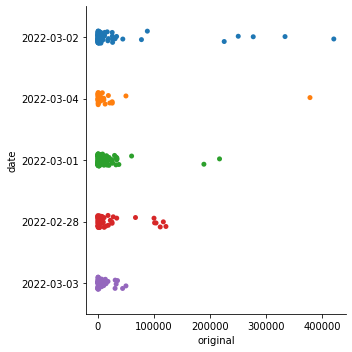

In [301]:
sns.catplot(x="original", y="date",  data=df_trim)

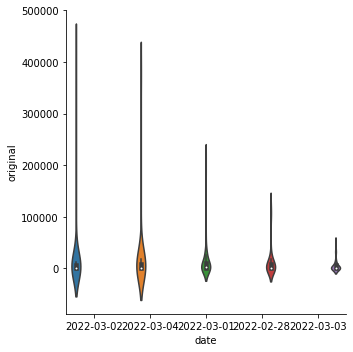

In [302]:
sns.catplot(x="date", y="original", hue="date",
            kind="violin", data=df_trim)